In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
reviews = pd.read_csv('data/reviews.csv')

In [3]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...


In [4]:
reviews.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [6]:
reviews['Date'] = pd.to_datetime(reviews.date)

In [10]:
reviews.drop('date', axis=1, inplace=True)

In [11]:
calendar = pd.read_csv('data/calendar.csv')

In [13]:
calendar.head()

,listing_id,date,available,price
0,2818,2019-12-05,f,NaN
1,73208,2019-08-30,f,NaN
2,73208,2019-08-29,f,NaN
3,73208,2019-08-28,f,NaN
4,73208,2019-08-27,f,NaN


In [17]:
calendar['Date'] = pd.to_datetime(calendar.date)

In [19]:
min(calendar.Date)

Timestamp('2018-12-06 00:00:00')

In [22]:
max(calendar.Date)

Timestamp('2019-12-06 00:00:00')

In [20]:
listings = pd.read_csv('data/listings.csv')

/Users/roblee/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20181206172549,2018-12-06,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.10
1,3209,https://www.airbnb.com/rooms/3209,20181206172549,2018-12-06,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,Welcome to the Spaarndammerbuurt! From the beg...,...,f,NaN,{Amsterdam},f,f,moderate,f,f,1,1.03
2,20168,https://www.airbnb.com/rooms/20168,20181206172549,2018-12-06,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,2.18
3,25428,https://www.airbnb.com/rooms/25428,20181206172549,2018-12-06,Lovely apt in City Centre (Jordaan),NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,0.09
4,27886,https://www.airbnb.com/rooms/27886,20181206172549,2018-12-06,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.03


Looks like listings will not help much.  

Need to extract y from calendar.

In [25]:
calendar['avail_mask'] = calendar.available.apply(lambda x: 1 if x == 't' else 0)

In [30]:
calendar['booked_mask'] = calendar.available.apply(lambda x: 1 if x == 'f' else 0)

In [27]:
calendar.head()

,listing_id,date,available,price,Date,avail_mask
0,2818,2019-12-05,f,NaN,2019-12-05,0
1,73208,2019-08-30,f,NaN,2019-08-30,0
2,73208,2019-08-29,f,NaN,2019-08-29,0
3,73208,2019-08-28,f,NaN,2019-08-28,0
4,73208,2019-08-27,f,NaN,2019-08-27,0


In [28]:
avail = calendar.groupby('listing_id').agg({'avail_mask': 'sum'})

In [31]:
booked = calendar.groupby('listing_id').agg({'booked_mask': 'sum'})

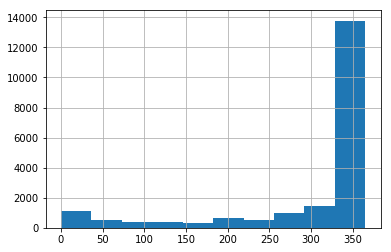

In [36]:
booked.booked_mask.hist()

### Make price a number

In [47]:
calendar['Price'] = calendar.price.apply(lambda x: np.NaN if x == 'NaN' else float(str(x).lstrip('$').replace(',', '')))

In [48]:
calendar.dtypes

listing_id              int64
date                   object
available              object
price                  object
Date           datetime64[ns]
avail_mask              int64
booked_mask             int64
Price                 float64
dtype: object

In [52]:
listing_avg_price = calendar.groupby('listing_id').agg({'Price': 'mean'})

In [53]:
listing_avg_price.to_csv('data/listing_avg_price.csv')